In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *

#My image
file_path = '../Dropbox Files/hel1.pma'
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
avg_frame_data = avg_frame_arr(file_path)

Image Size: 512 x 512
Sucessfully generated average frame


In [2]:
#Chanel image paths
CH1_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"
#Chanel arrays
avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]
# Image.fromarray(avg_frame_data_CH2).save(CH2_img_path)

In [3]:

#Chanel images
image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

print(f"Average CH1 Frame Data- shape: {avg_frame_data_CH1.shape}")
print(f"Average CH1 Frame Data- Type: {type(avg_frame_data_CH1)}")
print(f"Average CH1 Frame Data- dType: {avg_frame_data_CH1.dtype}")

print(f"\nAverage CH2 Frame Data- shape: {avg_frame_data_CH2.shape}")
print(f"Average CH2 Frame Data- Type: {type(avg_frame_data_CH2)}")
print(f"Average CH2 Frame Data- dType: {avg_frame_data_CH2.dtype}")

Average CH1 Frame Data- shape: (512, 256)
Average CH1 Frame Data- Type: <class 'numpy.ndarray'>
Average CH1 Frame Data- dType: uint8

Average CH2 Frame Data- shape: (512, 256)
Average CH2 Frame Data- Type: <class 'numpy.ndarray'>
Average CH2 Frame Data- dType: uint8


In [4]:
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2 = find_peaks_scipy_IDL(CH2_img_path)[0]

/var/folders/r0/qp6_p2111v1dzb0fg2bbfqsr0000gn/T/ipykernel_47503/785767849.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend(loc='upper right', bbox_to_anchor=(1.3, 1))


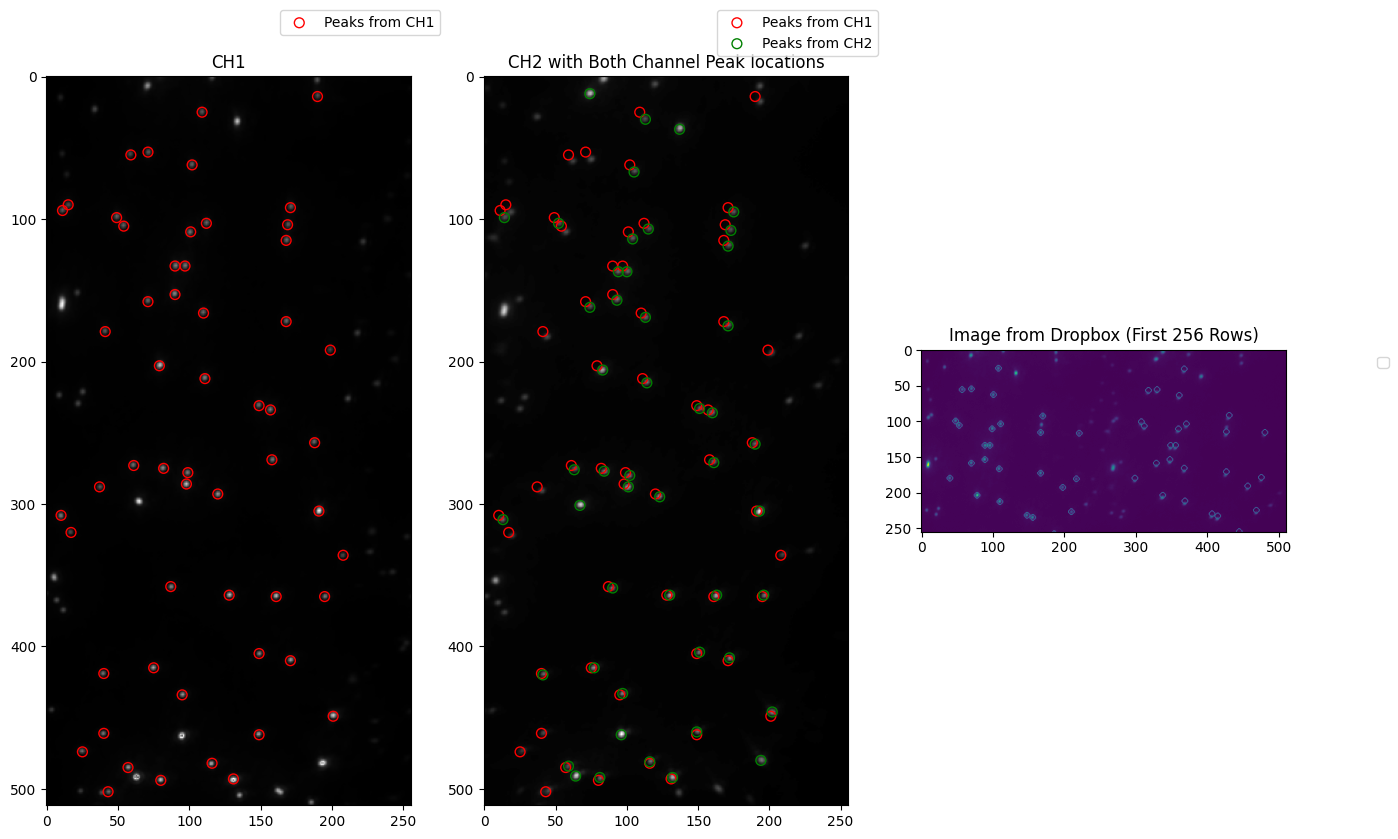

In [5]:
#Testing: Default parameters
good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2,_ = good_peak_finder(CH2_img_path)

f, axes = plt.subplots(1, 3, figsize=(16, 24))

axes[0].imshow(image_CH1, cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
axes[0].set_title('CH1')

axes[1].imshow(image_CH2, cmap="gray")
axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[1].scatter(good_peaks_2[:, 1], good_peaks_2[:, 0], s=50, facecolors='none', edgecolors='g', label='Peaks from CH2')
axes[1].legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
axes[1].set_title('CH2 with Both Channel Peak locations')

#Make this larger
axes[2].imshow(hel1_ave_image)
axes[2].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
axes[2].set_title('Image from Dropbox (First 256 Rows)')
plt.show()

# Changing CH2 parameters to find peak pattern that more closely resembles those found in CH1

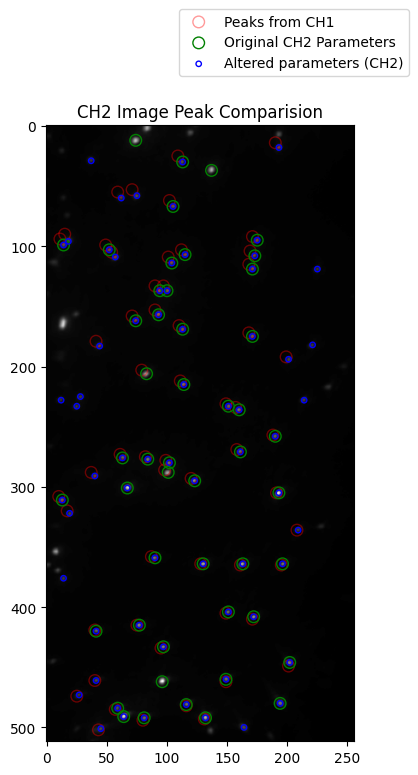

In [6]:
#Changing any parameters to see if the blue circle more closely resemble the red circles. 
peaks_coords_IDL_CH2_new = find_peaks_scipy_IDL(CH2_img_path, sigma=2, block_size=16, scaler_percent=10)[0]
good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("CH2 Image Peak Comparision")
plt.imshow(image_CH2, cmap="gray")
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=70, facecolors='none', edgecolors='r', alpha = 0.4, label='Peaks from CH1')
plt.scatter(good_peaks_2[:, 1], good_peaks_2[:, 0], s=70, facecolors='none', edgecolors='g', label='Original CH2 Parameters')
plt.scatter(good_peaks_2_new[:, 1], good_peaks_2_new[:, 0], s=15, facecolors='none', edgecolors='b', label='Altered parameters (CH2)')
#move legend upwards
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show();


#### Changing the parameters does infact improve peak detection
#### AKA: blue peaks more closely resemble the red peaks
#### The blue circles do pick up a lot of the peaks that the red do not but that is because the scaler percentage is set so low.
#### We shall continue with the good_peaks_2_new variable!! And define a new good_peak_finder for CH2 with altered variable default values.

In [7]:
# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

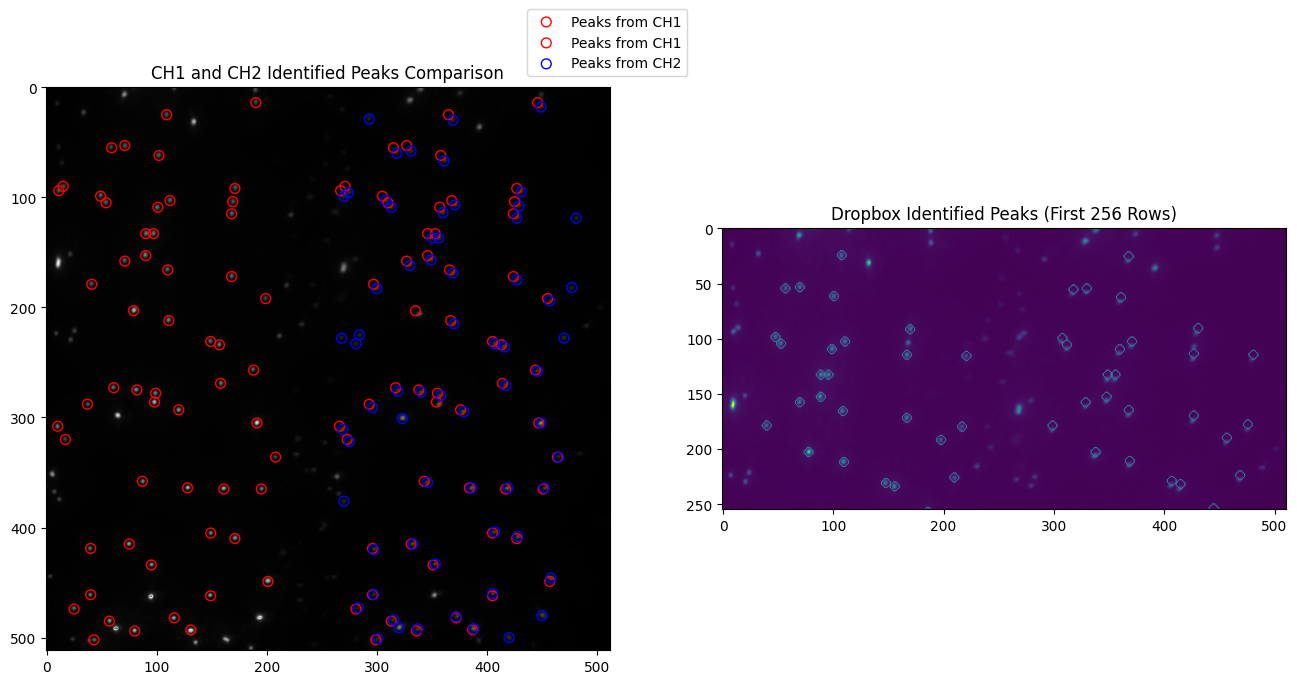

In [8]:
#All in one image!
f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks Comparison")
axes[0].imshow(image, cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_1_CH2[:, 1], good_peaks_1_CH2[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.15))

axes[1].set_title("Dropbox Identified Peaks (First 256 Rows)")
axes[1].imshow(hel1_ave_image)
plt.show()


# How can I map between channel spots ?

Number of peaks identified in CH1: 56
Number of peaks identified in CH2: 66


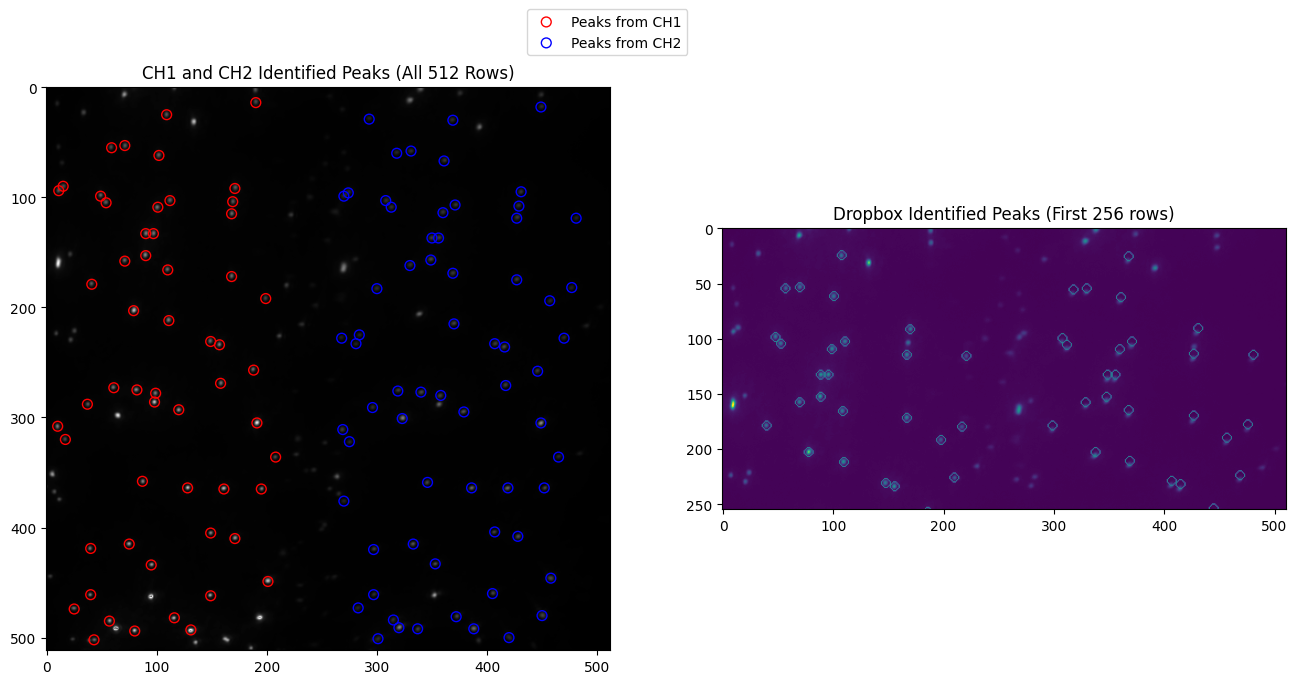

In [9]:
#All in one image!
print(f"Number of peaks identified in CH1: {len(good_peaks_1)}")
print(f"Number of peaks identified in CH2: {len(good_peaks_2_CH2)}")

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks (All 512 Rows)")
axes[0].imshow(image, cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.15))

axes[1].set_title("Dropbox Identified Peaks (First 256 rows)")
axes[1].imshow(hel1_ave_image)
plt.show()